In [82]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix


In [83]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [84]:
import random
from __future__ import print_function

KNN  implications

some preprocess and setup for data analysis

In [85]:

#  make matplotlib figures appear inline in the notebook and load the data 
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

#using inspect module Define function for inspecting the source code of a function
import inspect
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import Terminal256Formatter


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:

def pretty_print(func):
  source_code = inspect.getsourcelines(func)[0]
  for line in source_code:
    print(highlight(line.strip('\n'), PythonLexer(), Terminal256Formatter()), end='')
  print(' ')

In [52]:
#shape of trainning data set
print('Training data shape:', X_train.shape)
print('Test data shape :', X_test.shape)
print('Training labels shape: ', y_train.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


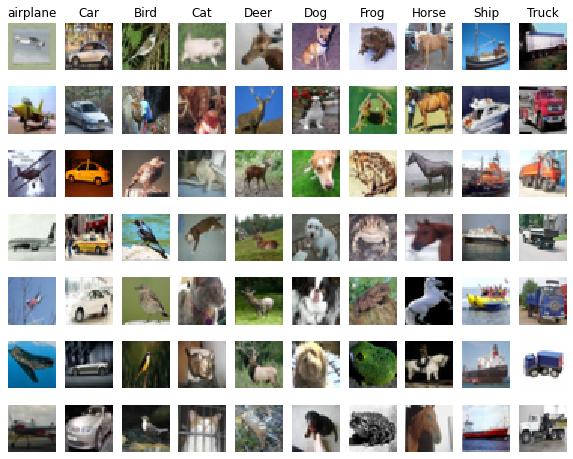

In [88]:
# Visualize of  dataset.
# Visulation  of training some images from each class.
label = ['airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
num_classes = len(label)
samples_per_class = 7
for y, cls in enumerate(label):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [89]:
# some Subsample of the data for more efficient code execution in this exercise
num_training = 5000
masvalue = list(range(num_training))
X_train = X_train[masvalue]
y_train = y_train[masvalue]

#set num test as 500
num_test = 500
#create a list masvalue 
masvalue = list(range(num_test))
X_test = X_test[masvalue]
y_test = y_test[masvalue]

In [93]:
print("xtrain =",X_train)


xtrain = [[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [167 163 145 ...  42  78  84]
 [154 152 125 ... 194 247 114]
 [ 45  32  21 ... 156 142 100]]


In [94]:
print("x_test= ",X_test)

x_test=  [[158 112  49 ...  21  67 110]
 [235 235 235 ... 186 200 199]
 [158 190 222 ...   7   8   7]
 ...
 [ 74 126 176 ... 141 199 251]
 [145 162 125 ... 117 119 105]
 [185 189 188 ... 211 212 206]]


In [95]:
print("y_train =",y_train)

y_train = [[6]
 [9]
 [9]
 ...
 [5]
 [4]
 [6]]


In [96]:
print("y_test =",y_test)

y_test = [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]
 [7]
 [0]
 [4]
 [9]
 [5]
 [2]
 [4]
 [0]
 [9]
 [6]
 [6]
 [5]
 [4]
 [5]
 [9]
 [2]
 [4]
 [1]
 [9]
 [5]
 [4]
 [6]
 [5]
 [6]
 [0]
 [9]
 [3]
 [9]
 [7]
 [6]
 [9]
 [8]
 [0]
 [3]
 [8]
 [8]
 [7]
 [7]
 [4]
 [6]
 [7]
 [3]
 [6]
 [3]
 [6]
 [2]
 [1]
 [2]
 [3]
 [7]
 [2]
 [6]
 [8]
 [8]
 [0]
 [2]
 [9]
 [3]
 [3]
 [8]
 [8]
 [1]
 [1]
 [7]
 [2]
 [5]
 [2]
 [7]
 [8]
 [9]
 [0]
 [3]
 [8]
 [6]
 [4]
 [6]
 [6]
 [0]
 [0]
 [7]
 [4]
 [5]
 [6]
 [3]
 [1]
 [1]
 [3]
 [6]
 [8]
 [7]
 [4]
 [0]
 [6]
 [2]
 [1]
 [3]
 [0]
 [4]
 [2]
 [7]
 [8]
 [3]
 [1]
 [2]
 [8]
 [0]
 [8]
 [3]
 [5]
 [2]
 [4]
 [1]
 [8]
 [9]
 [1]
 [2]
 [9]
 [7]
 [2]
 [9]
 [6]
 [5]
 [6]
 [3]
 [8]
 [7]
 [6]
 [2]
 [5]
 [2]
 [8]
 [9]
 [6]
 [0]
 [0]
 [5]
 [2]
 [9]
 [5]
 [4]
 [2]
 [1]
 [6]
 [6]
 [8]
 [4]
 [8]
 [4]
 [5]
 [0]
 [9]
 [9]
 [9]
 [8]
 [9]
 [9]
 [3]
 [7]
 [5]
 [0]
 [0]
 [5]
 [2]
 [2]
 [3]
 [8]
 [6]
 [3]
 [4]
 [0]
 [5]
 [8]
 [0]
 [1]
 [7]
 [2]
 [8]
 [8]
 

In [91]:
# change the shape of  dataset  
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))


In [97]:
#check the shape of data 
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


apply esamble learning 

In [107]:
from sklearn.ensemble import BaggingClassifier

In [108]:
# Create a kNN classifier instance.
from sklearn.neighbors import KNeighborsClassifier  
# the Classifier simply remembers the data and does no further processing 
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',n_neighbors=4)
#fit the model
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [110]:
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

In [111]:
bagging.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [113]:
y_bag_pred= bagging.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_bag_pred)


0.288

In [101]:
#predict the model 
y_pred = classifier.predict(X_test)
y_pred

array([4, 8, 8, 8, 4, 2, 6, 2, 2, 8, 0, 4, 4, 6, 8, 2, 5, 4, 8, 2, 2, 0,
       0, 4, 2, 4, 6, 4, 2, 2, 6, 2, 4, 6, 8, 1, 2, 0, 2, 2, 8, 6, 0, 4,
       0, 0, 5, 0, 4, 2, 8, 8, 6, 2, 8, 8, 4, 6, 0, 0, 4, 6, 6, 3, 4, 2,
       8, 0, 3, 9, 0, 6, 8, 8, 0, 2, 0, 3, 4, 8, 8, 3, 6, 2, 2, 2, 2, 8,
       8, 8, 0, 2, 8, 6, 4, 4, 4, 0, 0, 4, 4, 4, 3, 3, 1, 1, 6, 6, 5, 5,
       2, 0, 6, 0, 4, 4, 2, 4, 4, 4, 0, 4, 2, 6, 8, 4, 0, 2, 4, 2, 2, 1,
       0, 6, 0, 0, 9, 0, 2, 8, 2, 0, 6, 2, 8, 2, 6, 5, 3, 8, 0, 7, 2, 0,
       4, 4, 0, 8, 5, 0, 0, 4, 2, 2, 0, 0, 8, 2, 5, 0, 8, 7, 0, 8, 4, 0,
       0, 2, 6, 0, 8, 4, 2, 4, 0, 0, 6, 6, 0, 8, 3, 4, 2, 3, 6, 2, 8, 0,
       3, 2, 2, 0, 8, 2, 2, 4, 0, 2, 2, 8, 4, 8, 2, 2, 8, 2, 0, 1, 0, 4,
       4, 3, 0, 0, 2, 2, 1, 2, 0, 4, 3, 1, 2, 2, 0, 0, 2, 9, 0, 0, 0, 0,
       8, 0, 2, 2, 4, 0, 4, 3, 2, 3, 4, 2, 2, 8, 4, 0, 8, 4, 5, 4, 3, 0,
       0, 8, 8, 4, 0, 0, 2, 2, 6, 3, 8, 3, 8, 2, 2, 5, 1, 4, 2, 8, 0, 4,
       5, 0, 8, 4, 2, 2, 2, 8, 4, 4, 6, 0, 0, 2, 2,

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
y_tes= np.array(y_test)
y_tes= y_test.ravel()
y_tes

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0,
       4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6,
       0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2,
       1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7,
       8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7,
       4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1,
       8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0,
       0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9,
       3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8,
       7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2,
       7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1,
       8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7,
       0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9,
       1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6,

In [104]:
accuracy_score(y_tes, y_pred)

0.272

In [105]:
ff=[]
for k in range(1,100,5):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train, y_train)
  y_predq = classifier.predict(X_test)
  ff.append(accuracy_score(y_tes, y_predq))
print(ff)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[0.274, 0.282, 0.262, 0.268, 0.266, 0.266, 0.246, 0.252, 0.252, 0.246, 0.24, 0.238, 0.242, 0.236, 0.24, 0.226, 0.228, 0.222, 0.216, 0.222]


In [79]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier, X_train, y_train, cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

array([0.267, 0.258, 0.275, 0.294, 0.266])